In [26]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling traing!!!...")
            self.model.stop_training=True
callbacks=myCallback()

In [28]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(16,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

In [30]:
train_dir = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Train"
val_dir = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Validation"
test_dir = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Test"

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1.0/255.0)
validation_datagen = ImageDataGenerator( rescale = 1.0/255.0)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary',
    shuffle=False)

Found 750 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [32]:
model.compile(optimizer=keras.optimizers.Adam(lr= 0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
history=model.fit_generator(train_generator, epochs=20, verbose=1, validation_data=validation_generator,callbacks=[callbacks])

Epoch 1/20
15/15 [==============================] - 60s 4s/step - loss: 0.6672 - acc: 0.7000 - val_loss: 0.3830 - val_acc: 0.8571
Epoch 2/20
15/15 [==============================] - 48s 3s/step - loss: 0.2528 - acc: 0.9040 - val_loss: 0.1687 - val_acc: 0.9200
Epoch 3/20
15/15 [==============================] - 49s 3s/step - loss: 0.1577 - acc: 0.9427 - val_loss: 0.1755 - val_acc: 0.9514
Epoch 4/20
15/15 [==============================] - 43s 3s/step - loss: 0.0843 - acc: 0.9720 - val_loss: 0.0943 - val_acc: 0.9743
Epoch 5/20
15/15 [==============================] - 43s 3s/step - loss: 0.0559 - acc: 0.9787 - val_loss: 0.0975 - val_acc: 0.9686
Epoch 6/20
15/15 [==============================] - 40s 3s/step - loss: 0.0402 - acc: 0.9893 - val_loss: 0.0707 - val_acc: 0.9686
Epoch 7/20
14/15 [===========================>..] - ETA: 1s - loss: 0.0277 - acc: 0.9914
Reached 99% accuracy so cancelling traing!!!...
15/15 [==============================] - 40s 3s/step - loss: 0.0290 - acc: 0.9920 -

<Figure size 1152x720 with 0 Axes>

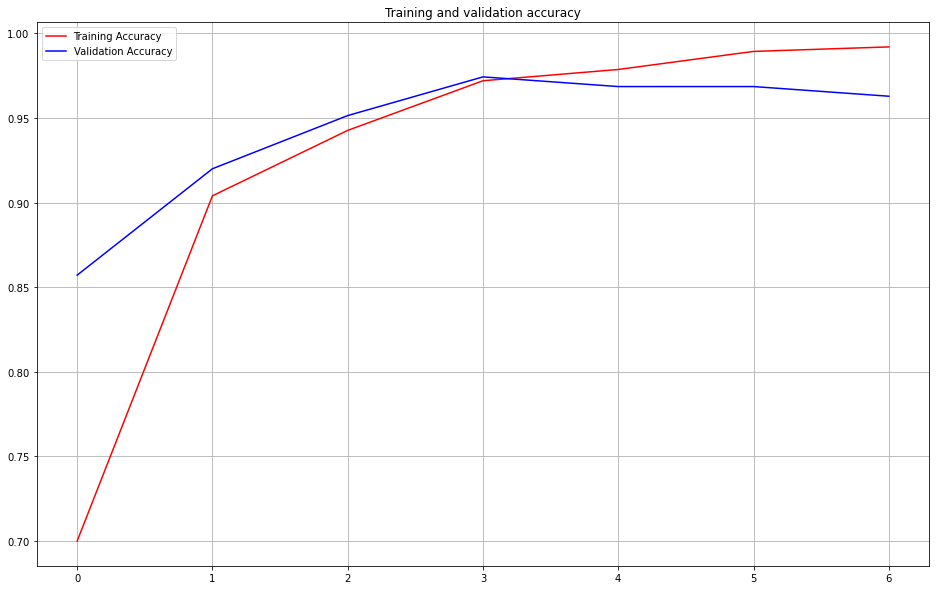

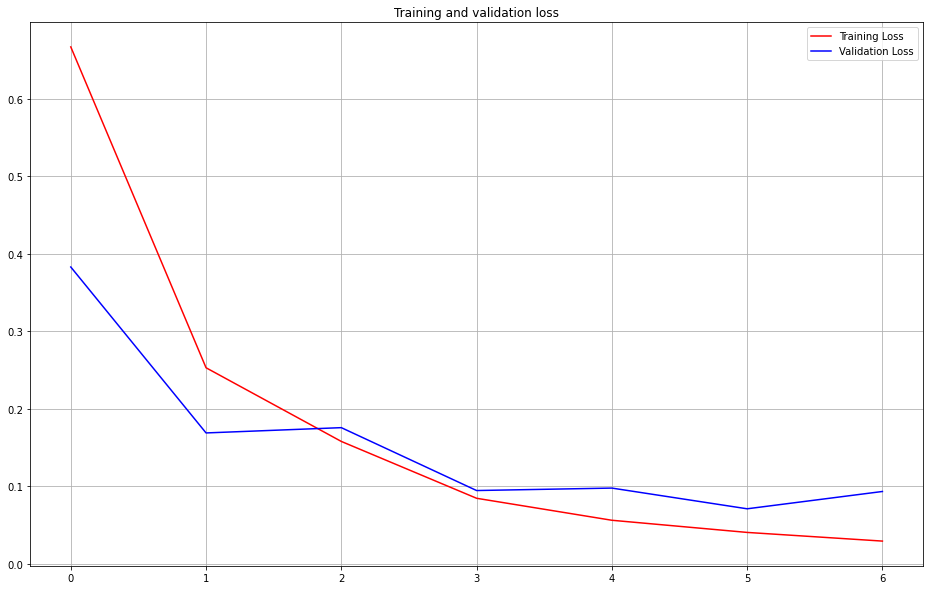

<Figure size 1152x720 with 0 Axes>

In [34]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
plt.figure(figsize=(16,10))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r',label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.grid()
plt.legend(loc='upper left')
plt.figure(figsize=(16,10))


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r',label = "Training Loss")
plt.plot(epochs, val_loss, 'b',label = "Validation Loss")
plt.title('Training and validation loss')
plt.grid()
plt.legend(loc='upper right')
plt.figure(figsize=(16,10))

# Desired output. Charts with training and validation metrics. No crash :)

In [38]:
model.save("F:/Study Materials/Summer 2020/Mask_recg/model_just_load.h5")
print("The model is saved.")

The model is saved.


Found 350 images belonging to 2 classes.

===========Confusion Matrix(Validation Set)===========

[[147   3]
 [ 10 190]]


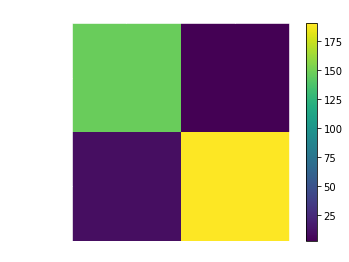


===========Classification Report(Validation Set)===========

              precision    recall  f1-score   support

        Mask       0.94      0.98      0.96       150
     No mask       0.98      0.95      0.97       200

    accuracy                           0.96       350
   macro avg       0.96      0.96      0.96       350
weighted avg       0.96      0.96      0.96       350



In [52]:
from sklearn.metrics import classification_report, confusion_matrix
val_dir = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Validation"
val_datagen = ImageDataGenerator( rescale = 1.0/255.0)
val_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    class_mode='binary',
    shuffle=False)

V_Pred = model.predict_generator(val_generator)
v_pred =[]
for prediction in V_Pred:
    if prediction>0.5:
        v_pred.append(1)
    else:
        v_pred.append(0)
pred = np.array(v_pred)
print("\n===========Confusion Matrix(Validation Set)===========\n")
cm=confusion_matrix(val_generator.classes,v_pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticklabels(['']+class_labels)
ax.set_yticklabels(['']+class_labels)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.xaxis.label.set_color('w')
ax.yaxis.label.set_color('w')
ax.tick_params(axis='x',colors='w')
ax.tick_params(axis='y',colors='w')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
class_labels = ["Mask","No mask"]
print("\n===========Classification Report(Validation Set)===========\n")
print(classification_report(val_generator.classes, v_pred, target_names=class_labels))

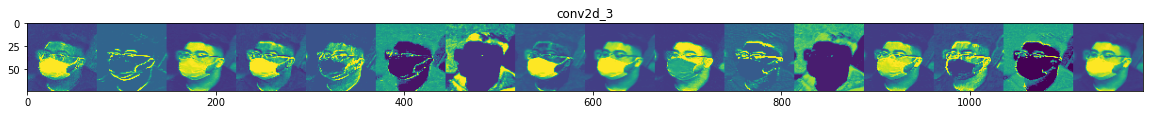

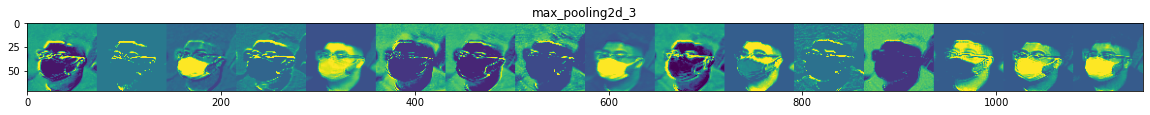

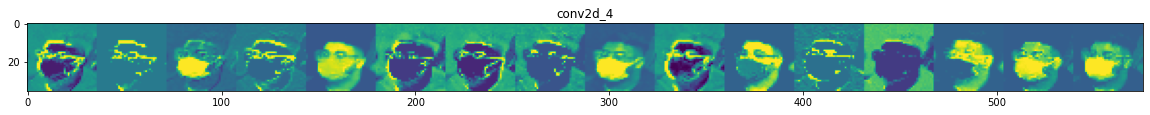

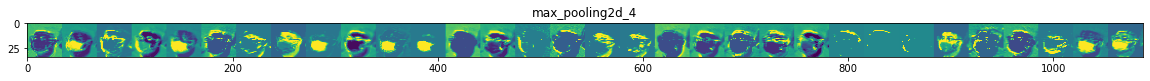

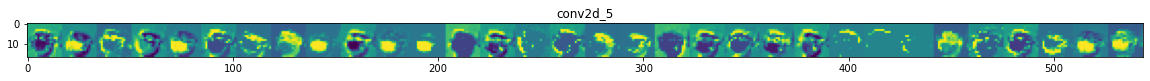

In [60]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
successive_outputs = [layer.output for layer in model.layers[1:]]
train_dir_mask = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Test/Mask"
train_dir_nomask = "F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Test/No_Mask"
train_dir_mask_fnames = os.listdir(train_dir_mask)
train_dir_nomask_fnames = os.listdir(train_dir_nomask)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
mask_img_files = [os.path.join(train_dir_mask,f) for f in train_dir_mask_fnames]
nomask_img_files = [os.path.join(train_dir_nomask,f) for f in train_dir_nomask_fnames]
img_path = random.choice(mask_img_files)
#img_path = random.choice(nomask_img_files)

img = load_img(img_path,target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,)+x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size,size * n_features))
        for i in range(n_features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype("uint8")
            
            display_grid[:, i * size : (i+1)*size]=x
        scale = 20./n_features
        plt.figure(figsize=(scale*n_features,scale))
        plt.title(layer_name)
        plt.imshow(display_grid,aspect="auto", cmap="viridis")

('F:/Study Materials/Summer 2020/Mask_recg/598475_1075843_bundle_archive/Mask_Datasets/Test/Mask/Mask (25).PNG',)
[[0.]]

Mask.


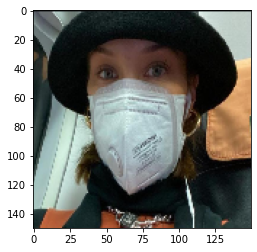

In [37]:
from tkinter import filedialog
from tkinter import *
from tensorflow.keras.preprocessing import image
root = Tk()
root.filename = filedialog.askopenfilenames(initialdir = test_dir, title = "Select File", filetypes = (("png","*.png"),("All Files","*.*")))
print(root.filename)
for path in root.filename:
    #root.destroy()
    img=image.load_img(path, target_size=(150,150))

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])

    classes = model.predict(images)

    print(classes)
    plt.figure()
    plt.imshow(img)
    if classes>0.5:
        print("\nWithout Mask.")
    else:
        print("\nMask.")
root.destroy()